In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM
import keras

In [2]:
data = pd.read_csv('LBMA-GOLD.csv')
display(data)

,Date,USD (PM)
0,2009/12/16,1324.60
1,9/13/16,1323.65
2,9/14/16,1321.75
3,9/15/16,1310.80
4,9/16/16,1308.35
...,...,...
1260,2009/6/21,1821.60
1261,2009/7/21,1802.15
1262,2009/8/21,1786.00
1263,2009/9/21,1788.25


In [10]:
# Setting the length of Training dataset
train_length = 1265-200
train_set = data.iloc[:train_length,[1]]
test_set = data.iloc[train_length:,[1]]
display(train_set)
display(test_set)

,USD (PM)
0,1324.60
1,1323.65
2,1321.75
3,1310.80
4,1308.35
...,...
1060,1876.10
1061,1857.35
1062,1875.70
1063,1840.20


,USD (PM)
1065,1810.20
1066,1807.40
1067,1779.30
1068,1762.55
1069,1810.75
...,...
1260,1821.60
1261,1802.15
1262,1786.00
1263,1788.25


In [14]:
sc = MinMaxScaler(feature_range=(0,1))
train_set_scaled = sc.fit_transform(train_set)
test_set_scaled = sc.transform(test_set)

In [ ]:
x_train = []
y_train = []

x_test = []
y_test = []

for i in range(5, len(train_set_scaled)):
    x_train.append(train_set_scaled[i-5:i])
    y_train.append(train_set_scaled[i])

for i in range(5, len(test_set_scaled)):
    x_test.append(test_set_scaled[i-5:i])
    y_test.append(test_set_scaled[i])

x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)

In [20]:
display(x_train.shape)
display(x_test.shape)

(1060, 5, 1)

(195, 5, 1)

In [25]:
model = keras.Sequential()
model.add(LSTM(80, return_sequences=True, activation='relu'))
model.add(LSTM(100, return_sequences=False, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss = 'mse', optimizer=keras.optimizers.Adam(0.01))

history = model.fit(x_train, y_train, batch_size=32, epochs=100, verbose=2, validation_data=(x_test, y_test))

Epoch 1/100
34/34 - 4s - 111ms/step - loss: 0.0206 - val_loss: 0.0012
Epoch 2/100
34/34 - 2s - 58ms/step - loss: 0.0011 - val_loss: 9.9768e-04
Epoch 3/100
34/34 - 2s - 58ms/step - loss: 7.0482e-04 - val_loss: 0.0034
Epoch 4/100
34/34 - 2s - 58ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 5/100
34/34 - 2s - 58ms/step - loss: 6.1915e-04 - val_loss: 0.0011
Epoch 6/100
34/34 - 2s - 58ms/step - loss: 6.2637e-04 - val_loss: 0.0084
Epoch 7/100
34/34 - 2s - 58ms/step - loss: 0.0011 - val_loss: 8.5249e-04
Epoch 8/100
34/34 - 2s - 58ms/step - loss: 8.0664e-04 - val_loss: 0.0040
Epoch 9/100
34/34 - 2s - 58ms/step - loss: 7.1467e-04 - val_loss: 0.0032
Epoch 10/100
34/34 - 2s - 58ms/step - loss: 7.2756e-04 - val_loss: 9.5877e-04
Epoch 11/100
34/34 - 2s - 59ms/step - loss: 5.7380e-04 - val_loss: 8.7572e-04
Epoch 12/100
34/34 - 2s - 58ms/step - loss: 6.0924e-04 - val_loss: 0.0010
Epoch 13/100
34/34 - 2s - 58ms/step - loss: 6.3536e-04 - val_loss: 0.0010
Epoch 14/100
34/34 - 2s - 58ms/step - loss: 4.

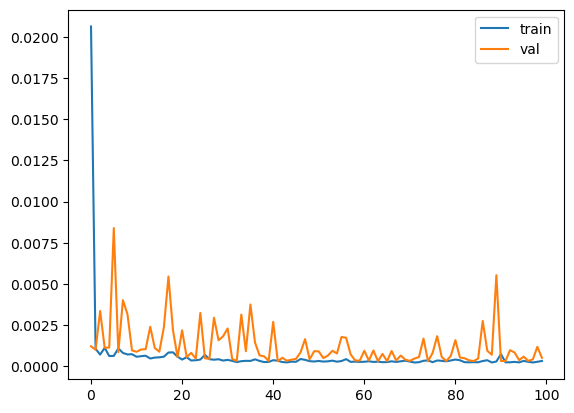

In [26]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'val')
plt.legend()
plt.show()

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 5, 80)          │        26,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100)            │        72,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 298,985 (1.14 MB)

 Trainable params: 99,661 (389.30 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 199,324 (778.61 KB)

In [32]:
pred = model.predict(x_test)
predict = sc.inverse_transform(pred)
display(predict.shape)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


(195, 1)

In [33]:
real = sc.inverse_transform(y_test)
display(real.shape)

(195, 1)

21.22984574750203
0.009165271650551976


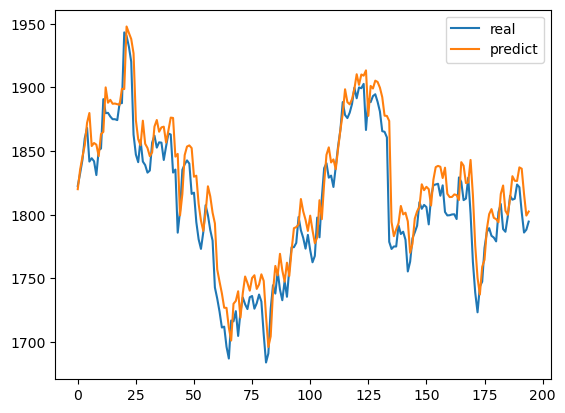

In [36]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error

rmse = root_mean_squared_error(predict, real)
mape = mean_absolute_percentage_error(predict, real)

print(rmse)
print(mape)

plt.plot(real, label ='real')
plt.plot(predict, label = 'predict')
plt.legend()
plt.show()